# Comparing Machine Learning Techniques to predict Bottom Hole Pressure in Volve wells

In [30]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt

In [31]:
fileurl = "https://github.com/orkahub/PEG_Python/raw/master/Data/Volve/Production_data/Volve%20production%20data.xlsx"
df_prod = pd.read_excel(fileurl)

In [32]:
df_prod.sample(5)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
11557,2014-08-31,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,6284.023544,injection,WI
15142,2015-05-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,4398.572632,injection,WI
7180,2014-05-29,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,258.734275,...,%,31.554635,89.183099,2.577029,418.28,61549.68,3592.57,NaN,production,OP
5074,2008-05-30,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000000,...,%,0.000000,0.000000,31.515180,0.00,0.00,0.00,NaN,production,OP
12055,2016-01-11,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,6939.190597,injection,WI


In [33]:
list(df_prod.columns)

['DATEPRD',
 'WELL_BORE_CODE',
 'NPD_WELL_BORE_CODE',
 'NPD_WELL_BORE_NAME',
 'NPD_FIELD_CODE',
 'NPD_FIELD_NAME',
 'NPD_FACILITY_CODE',
 'NPD_FACILITY_NAME',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_CHOKE_UOM',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

In [34]:
df_prod['AVG_CHOKE_UOM']

0          %
1          %
2          %
3          %
4          %
        ... 
15629      %
15630      %
15631      %
15632      %
15633    NaN
Name: AVG_CHOKE_UOM, Length: 15634, dtype: object

In [35]:
df_prod[['AVG_CHOKE_UOM', 'AVG_CHOKE_SIZE_P', 'DP_CHOKE_SIZE']].head(5)

,AVG_CHOKE_UOM,AVG_CHOKE_SIZE_P,DP_CHOKE_SIZE
0,%,0.000000,0.00000
1,%,1.003059,0.00000
2,%,0.979008,0.00000
3,%,0.545759,0.00000
4,%,1.215987,33.07195


In [36]:
column_names = {
    'DATEPRD': 'dates',
    'WELL_BORE_CODE': 'well_id',
    'NPD_WELL_BORE_CODE': 'well_name_code',
    'NPD_WELL_BORE_NAME': 'well_name',
    'NPD_FIELD_CODE': 'field_code',
    'NPD_FIELD_NAME': 'field_name',
    'NPD_FACILITY_CODE': 'facility_code',
    'NPD_FACILITY_NAME': 'facility_name',
    'ON_STREAM_HRS': 'on_stream_hours',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_ANNULUS_PRESS': 'casing_pressure',
    'AVG_CHOKE_SIZE_P': 'choke_size',
    'AVG_CHOKE_UOM': 'choke_units',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',
    'BORE_WI_VOL': 'water_inj',
    'FLOW_KIND': 'flow_kind',
    'WELL_TYPE': 'well_type'
}

In [37]:
df_prod.rename(columns=column_names, inplace=True)

In [38]:
df_prod.head(5)

,dates,well_id,well_name_code,well_name,field_code,field_name,facility_code,facility_name,on_stream_hours,bhp,...,choke_units,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol,water_inj,flow_kind,well_type
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [39]:
df_prod['well_type']

0        WI
1        OP
2        OP
3        OP
4        OP
         ..
15629    OP
15630    OP
15631    OP
15632    OP
15633    WI
Name: well_type, Length: 15634, dtype: object

In [40]:
df_prod = df_prod[df_prod['well_type']=='OP']

In [41]:
df_prod.shape

(9143, 24)

## Data Preparation

In [42]:
# Let's drop some columns
first_set_to_drop = ['well_id', 'on_stream_hours', 'casing_pressure', 'well_name_code', 
                   'field_code', 'field_name', 'facility_code', 'facility_name', 'choke_units', 
                   'choke_size', 'flow_kind', 'well_type', 'water_inj']
df = df_prod.drop(first_set_to_drop, axis=1)

In [43]:
df.head()

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
1,2014-04-08,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,0.0,0.0,0.0
5,2014-04-12,15/9-F-1 C,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,0.0,0.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9143 entries, 1 to 15632
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dates                  9143 non-null   datetime64[ns]
 1   well_name              9143 non-null   object        
 2   bhp                    8978 non-null   float64       
 3   bht                    8978 non-null   float64       
 4   dp_tubing              8978 non-null   float64       
 5   tht                    9137 non-null   float64       
 6   thp                    9129 non-null   float64       
 7   choke_size_percentage  9137 non-null   float64       
 8   oil_vol                9143 non-null   float64       
 9   gas_vol                9143 non-null   float64       
 10  water_vol              9143 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 857.2+ KB


In [45]:
df.isnull().sum()

dates                      0
well_name                  0
bhp                      165
bht                      165
dp_tubing                165
tht                        6
thp                       14
choke_size_percentage      6
oil_vol                    0
gas_vol                    0
water_vol                  0
dtype: int64

In [46]:
df[df['bhp'].isnull()]

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
1,2014-04-08,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
748,2013-07-10,15/9-F-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
750,2013-07-12,15/9-F-11,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,NaN,NaN,NaN,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,NaN,NaN,NaN,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,NaN,NaN,NaN,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,NaN,NaN,NaN,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

dates                    0
well_name                0
bhp                      0
bht                      0
dp_tubing                0
tht                      0
thp                      0
choke_size_percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
dtype: int64

In [49]:
wellnames = df['well_name'].unique()
wellnames

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

In [50]:
df.head()

,dates,well_name,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
4,2014-04-11,15/9-F-1 C,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,0.0,0.0,0.0
5,2014-04-12,15/9-F-1 C,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,0.0,0.0,0.0
6,2014-04-13,15/9-F-1 C,303.53481,96.95885,276.03200,27.50281,9.42315,16.16326,0.0,0.0,0.0
7,2014-04-14,15/9-F-1 C,303.78228,96.96873,282.78676,20.99552,8.13137,20.73712,0.0,0.0,0.0
8,2014-04-15,15/9-F-1 C,303.85821,97.02136,289.94067,13.91754,8.49833,12.18153,0.0,0.0,0.0


In [51]:
df.shape

(8978, 11)

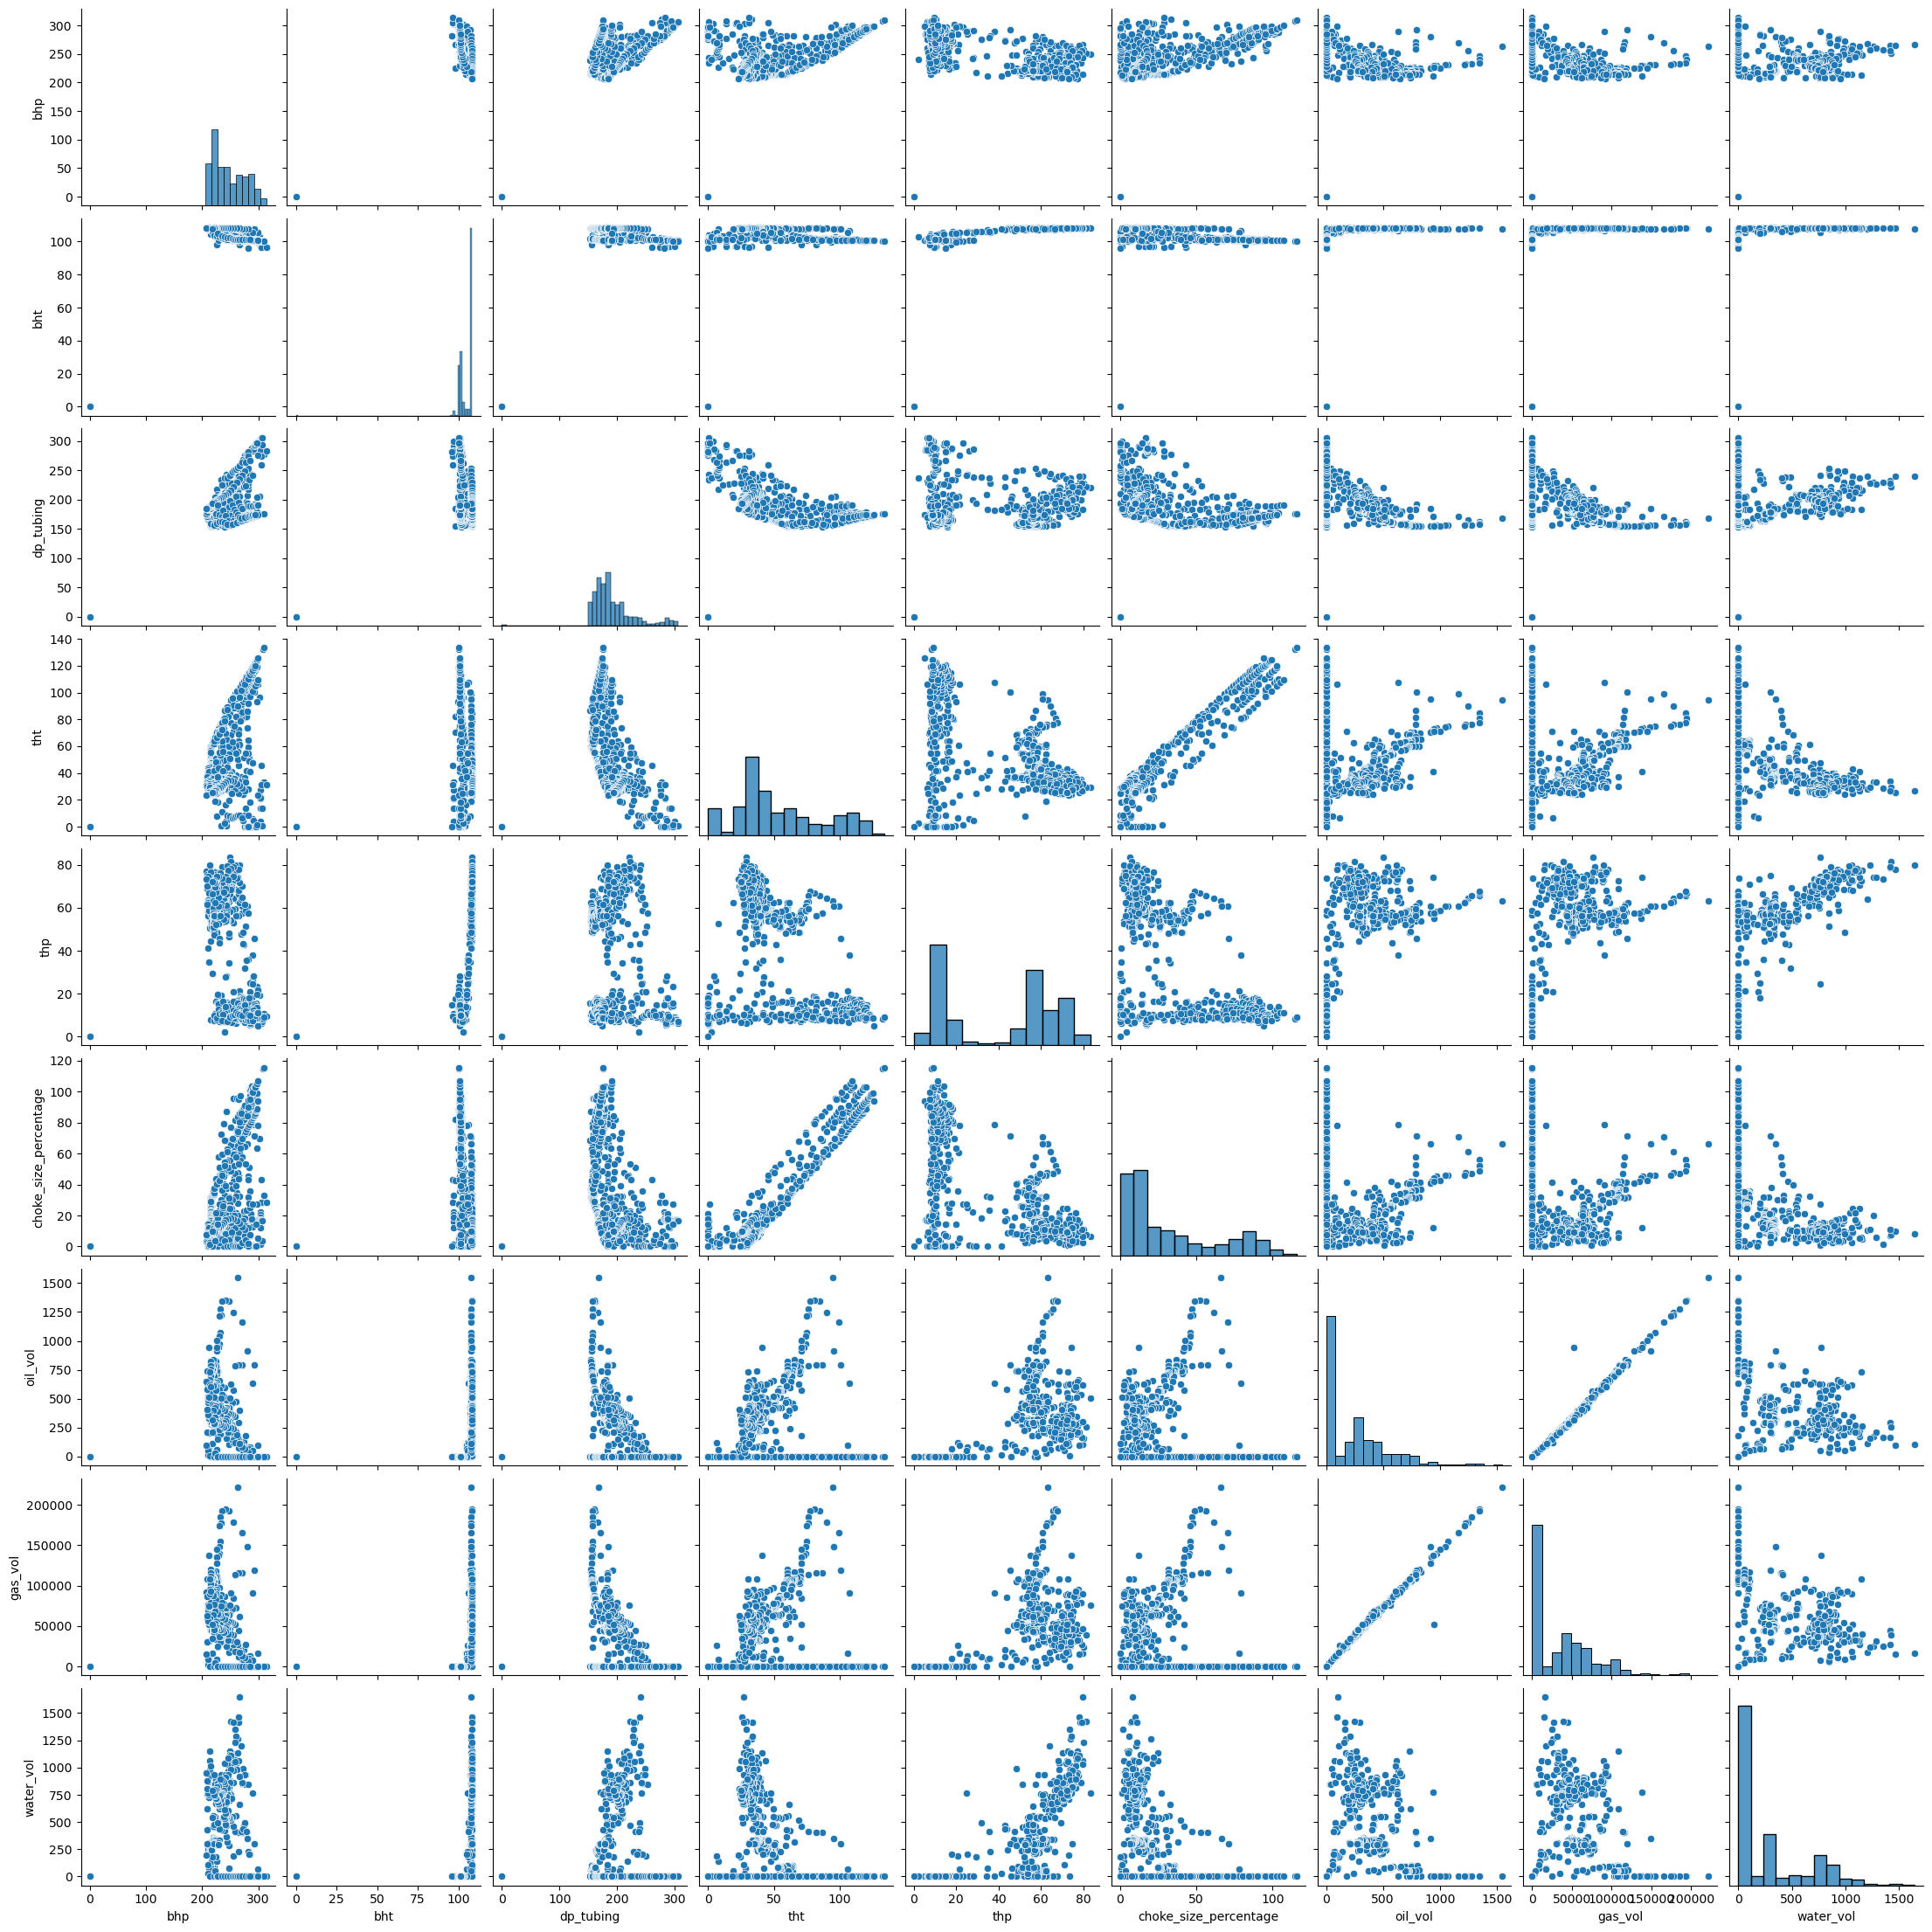

In [23]:
sns.pairplot(df[df['well_name']==wellnames[0]])

In [52]:
df.describe()

,dates,bhp,bht,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol
count,8978,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000
mean,2013-05-03 04:51:16.319892992,181.820413,77.168114,154.045010,45.774803,68.160861,19.454990,1107.055257,162684.259871,1704.698507
min,2008-02-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,2011-03-31 00:00:00,0.000000,0.000000,84.163947,31.420656,58.966528,3.480090,190.447500,29391.745000,20.875000
50%,2014-02-23 12:00:00,232.927076,103.186689,175.603884,38.303616,80.303883,9.881511,573.205000,89586.655000,1160.085000
75%,2015-05-28 00:00:00,255.405756,106.276408,204.335726,57.598695,88.118935,27.292412,1374.610000,207549.382500,3288.062500
max,2016-09-17 00:00:00,397.588550,108.502178,345.906770,137.311030,93.509584,125.718570,5888.690000,835981.330000,8019.740000
std,NaN,109.707241,45.654600,76.743653,24.686681,27.665425,22.613863,1325.247814,188338.136972,1708.823188


In [53]:
@interact
def boxdistplot(well= wellnames):
    df_temp = df[df['well_name']==well]
    df_temp = df_temp.drop(['dates', 'well_name'], axis=1)
    f, axes = plt.subplots(len(df_temp.columns), 2, figsize=(20,40))
    for i, colname in enumerate(df_temp.columns):
        sns.boxplot(df_temp[colname], ax = axes[i,1])
        sns.distplot(df_temp[colname], ax = axes[i,0])

interactive(children=(Dropdown(description='well', options=('15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14…

interactive(children=(Dropdown(description='well', options=('15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14…

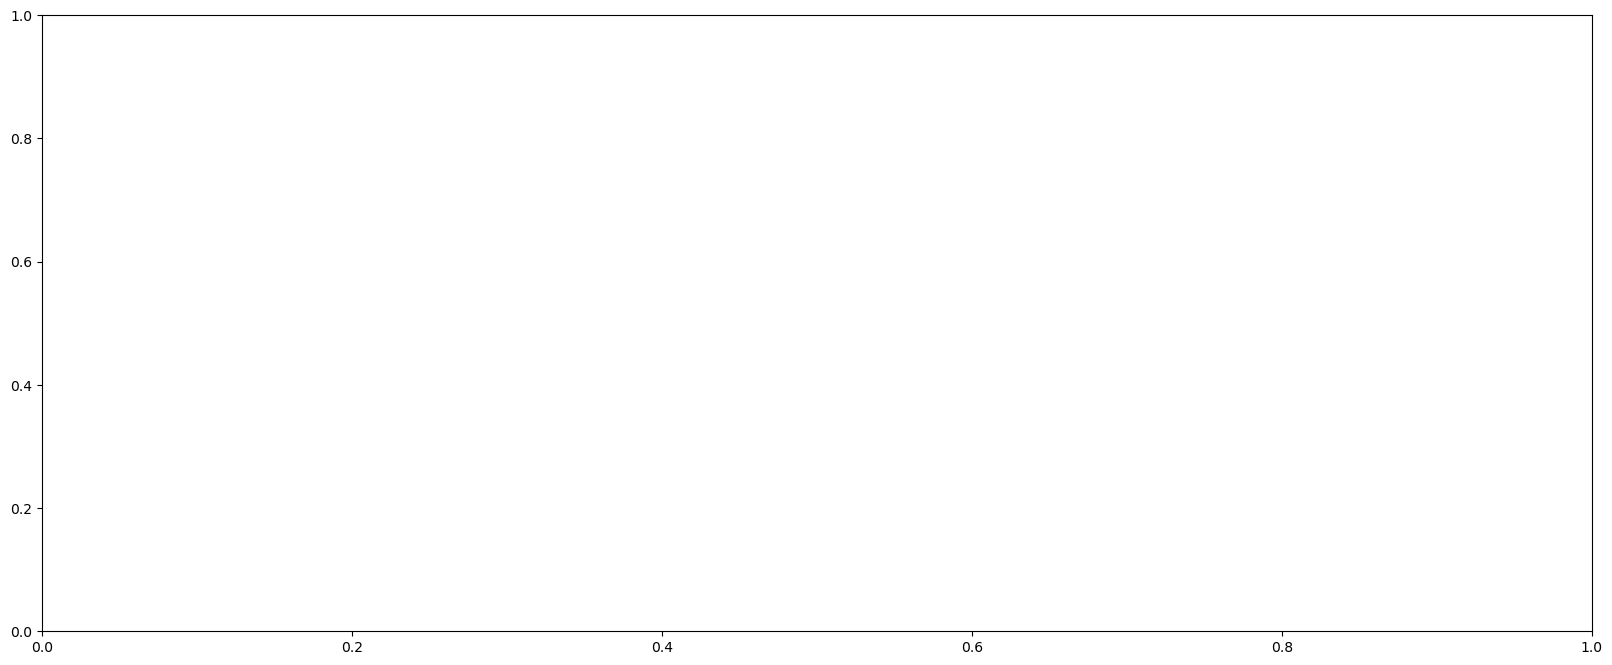

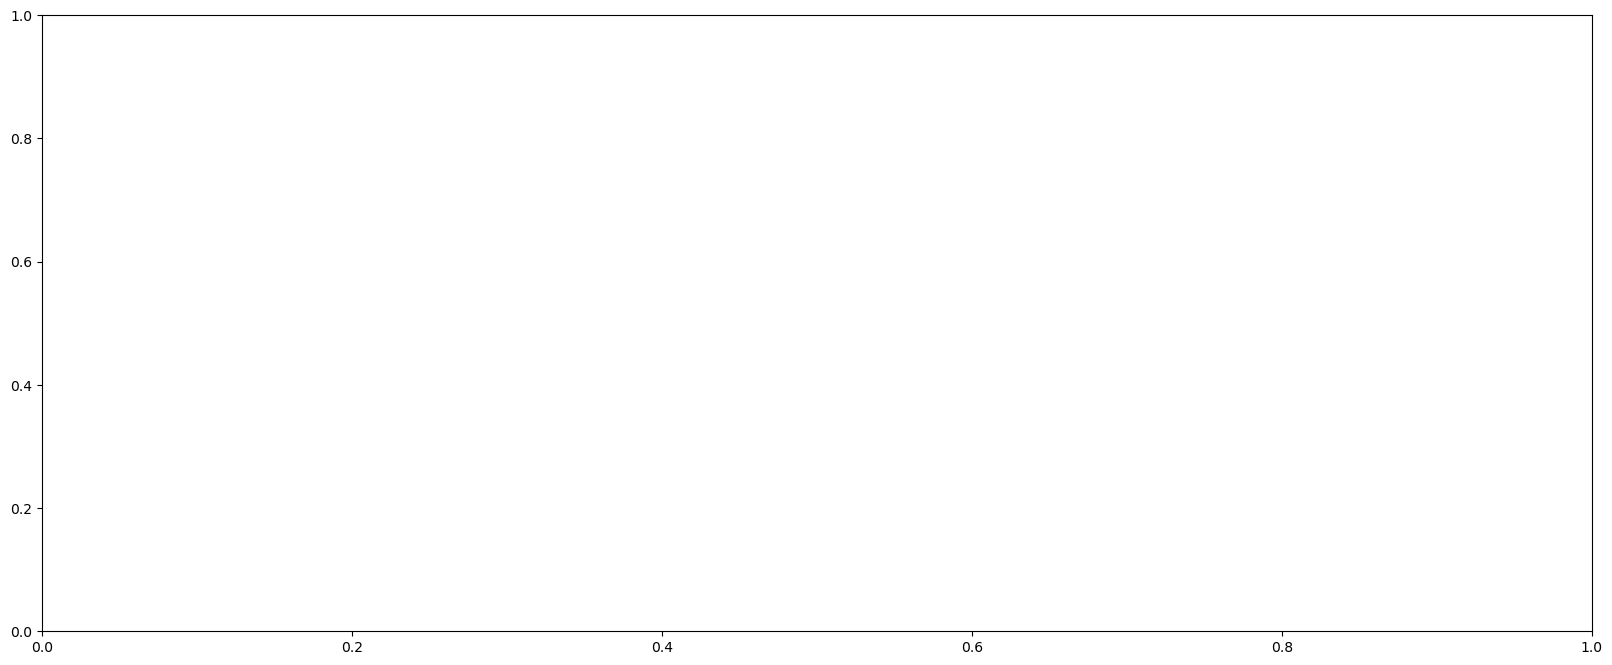

In [26]:
@interact
def thispairplot(well=wellnames, plot_variable = ['bhp', 'choke_size_percentage', 'bht', 'casing_pressure']):
    fig, ax = plt.subplots(figsize=(20,8))
    #plt.figure(figsize=(20,8))
    df_temp = df[df['well_name']==well]
    ax.scatter(df_temp['dates'], df_temp[plot_variable])
    ax.set_ylabel(plot_variable)
    ax2 = ax.twinx()
    ax2.scatter(df_temp['dates'], df_temp['oil_vol'], marker = 'x', color = 'black')
    ax2.set_ylabel('oil_vol')

In [27]:
# We still need to do more data cleaning
# My model will be predictive only while the well is open
df = df[(df['oil_vol']>0)& (df['bhp']>0)]

In [28]:
df.shape

(5940, 11)

## Feature Engineering

In [54]:
df['gor'] =df['gas_vol']/df['oil_vol']
df['wc'] = df['water_vol']/(df['water_vol']+df['oil_vol'])

In [55]:
df = df.drop(['gas_vol', 'water_vol'], axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8978 entries, 4 to 9000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dates                  8978 non-null   datetime64[ns]
 1   well_name              8978 non-null   object        
 2   bhp                    8978 non-null   float64       
 3   bht                    8978 non-null   float64       
 4   dp_tubing              8978 non-null   float64       
 5   tht                    8978 non-null   float64       
 6   thp                    8978 non-null   float64       
 7   choke_size_percentage  8978 non-null   float64       
 8   oil_vol                8978 non-null   float64       
 9   gor                    7866 non-null   float64       
 10  wc                     7865 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 841.7+ KB


In [57]:
wells_to_fit = wellnames[:2]
wells_to_fit

array(['15/9-F-1 C', '15/9-F-11'], dtype=object)

In [58]:
df_trainingwells = df[df['well_name'].isin(wells_to_fit)]

In [59]:
predictors = ['dp_tubing', 'tht', 'thp', 'choke_size_percentage', 'oil_vol', 'gor', 'wc']


## ML data input

In [60]:
X = df_trainingwells[predictors]
y = df_trainingwells['bhp']

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 15 to 1910
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dp_tubing              1547 non-null   float64
 1   tht                    1547 non-null   float64
 2   thp                    1547 non-null   float64
 3   choke_size_percentage  1547 non-null   float64
 4   oil_vol                1547 non-null   float64
 5   gor                    1547 non-null   float64
 6   wc                     1547 non-null   float64
dtypes: float64(7)
memory usage: 96.7 KB


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [67]:
X_train.head(5)

,dp_tubing,tht,thp,choke_size_percentage,oil_vol,gor,wc
1898,227.069778,26.730543,84.325186,3.305028,514.41,170.678622,0.845655
1048,179.566656,77.144796,47.801131,48.064523,493.47,137.572112,0.291022
1735,211.941282,29.174746,78.796407,2.930659,736.54,164.389687,0.766543
874,172.405742,81.437687,60.670476,53.115679,1162.76,154.151596,0.114803
1426,170.428683,49.589291,75.187447,21.009711,1726.85,146.003944,0.323202


In [68]:
y_train.head(5)

1898    253.800321
1048    256.711451
1735    241.116028
874     253.843429
1426    220.017974
Name: bhp, dtype: float64

In [69]:
X_train.shape

(1520, 7)

In [70]:
X_test.shape

(380, 7)

In [71]:
y_test.head()

1868    252.605690
419     256.605760
1173    219.763655
429     289.516740
1084    224.867792
Name: bhp, dtype: float64

In [72]:
# Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
# Importing preprocessing functionalities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [74]:
# Importing metrics
from sklearn.metrics import mean_squared_error

In [75]:
pipemodel = Pipeline([
    ('scl', StandardScaler()),
    ('reg', LinearRegression())
])

In [77]:
pipemodel.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [90]:
bhp_pred_lm_test = pipemodel.predict(X_test)
bhp_pred_lm_train = pipemodel.predict(X_train)

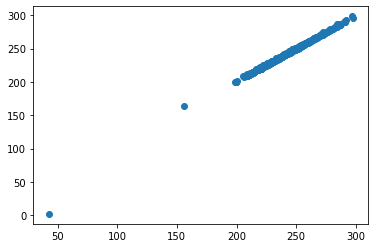

In [91]:
plt.scatter(bhp_pred_lm_train, y_train)

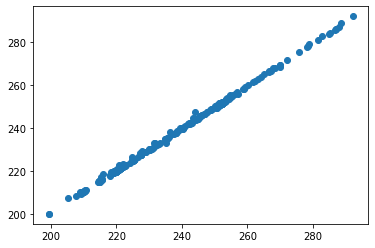

In [92]:
plt.scatter(bhp_pred_lm_test, y_test)

In [93]:
print(f'Training accuracy {pipemodel.score(X_train, y_train)}')

Training accuracy 0.9956085208282329


In [96]:
print(f'Test accuracy {pipemodel.score(X_test, y_test)}')

Test accuracy 0.9990313337672282


In [107]:
df_prod2 = df_prod[(df_prod['oil_vol']>0)& (df_prod['bhp']>0)]

In [110]:
df_prod2['gor'] =df_prod2['gas_vol']/df_prod2['oil_vol']
df_prod2['wc'] = df_prod2['water_vol']/(df_prod2['water_vol']+df_prod2['oil_vol'])

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


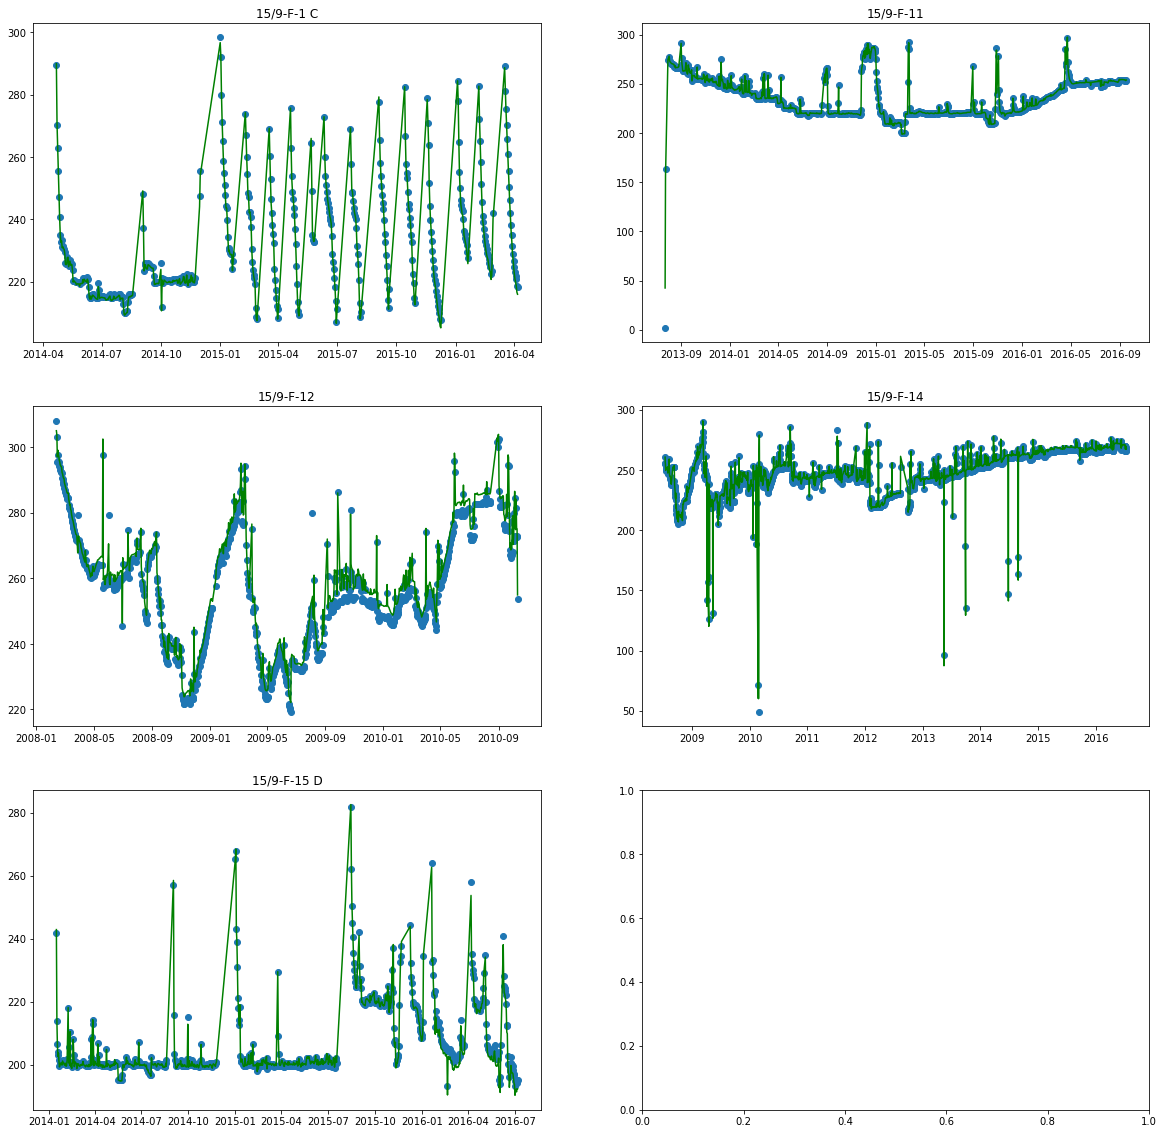

In [112]:
fig, ax = plt.subplots(3,2, figsize=(20,20))
row = [0, 0, 1, 1, 2]
col = [0, 1, 0, 1, 0]
df_prod2['bhp_lm'] = pipemodel.predict(df_prod2[predictors])
for i, well in enumerate(wellnames):
    dfpred = df_prod2[df_prod2['well_name']==well]
    #print(dfpred.shape)
    #plt.figure(figsize=(15,8))
    ax[row[i], col[i]].scatter(dfpred['dates'], dfpred['bhp'])
    ax[row[i], col[i]].set_title(well)
    ax[row[i], col[i]].plot(dfpred['dates'], dfpred['bhp_lm'], color='green')
    #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
plt.show();

### Running Decision Trees and Random Forest

In [116]:
def genericml(model):
    pipemodel = Pipeline([
        ('scl', StandardScaler()),
        ('reg', model)
    ])
    pipemodel.fit(X_train, y_train)
    return pipemodel

def plotter(model, modelname):
    fig, ax = plt.subplots(3,2, figsize=(20,20))
    row = [0, 0, 1, 1, 2]
    col = [0, 1, 0, 1, 0]
    df_prod2[modelname] = model.predict(df_prod2[predictors])
    for i, well in enumerate(wellnames):
        dfpred = df_prod2[df_prod2['well_name']==well]
        #print(dfpred.shape)
        #plt.figure(figsize=(15,8))
        ax[row[i], col[i]].scatter(dfpred['dates'], dfpred['bhp'])
        ax[row[i], col[i]].set_title(well)
        ax[row[i], col[i]].plot(dfpred['dates'], dfpred[modelname], color='green')
        #plt.plot(dfpred['dates'], dfpred['bhp_Random_Forest'], color='green')
    plt.show();

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


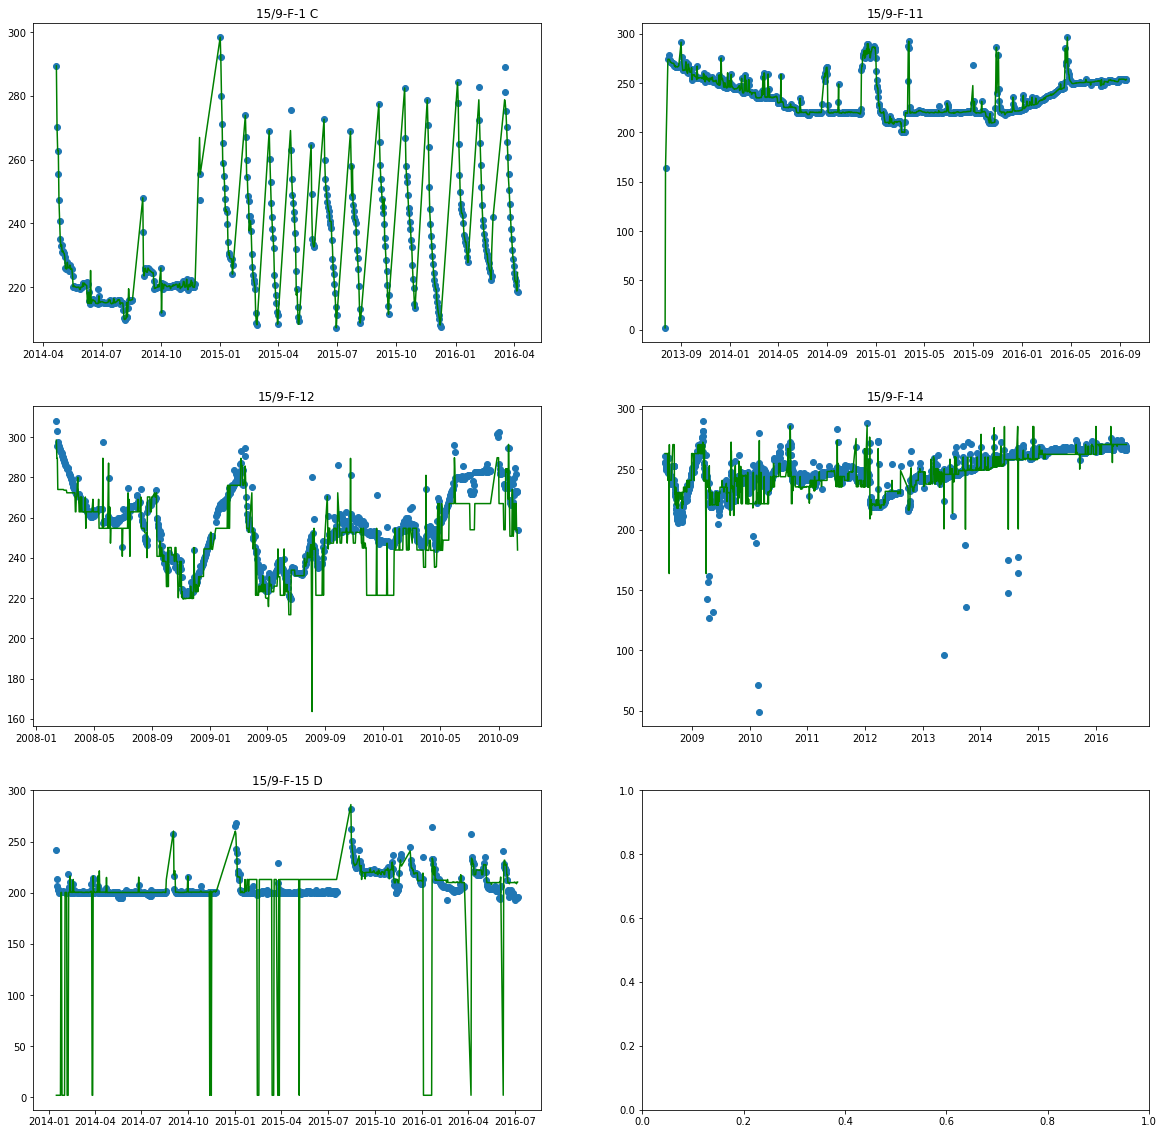

In [117]:
rf_reg = RandomForestRegressor()
#dtree_reg = DecisionTreeRegressor()

dtree_reg = genericml(DecisionTreeRegressor())
plotter(dtree_reg, "bhp_DT")

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


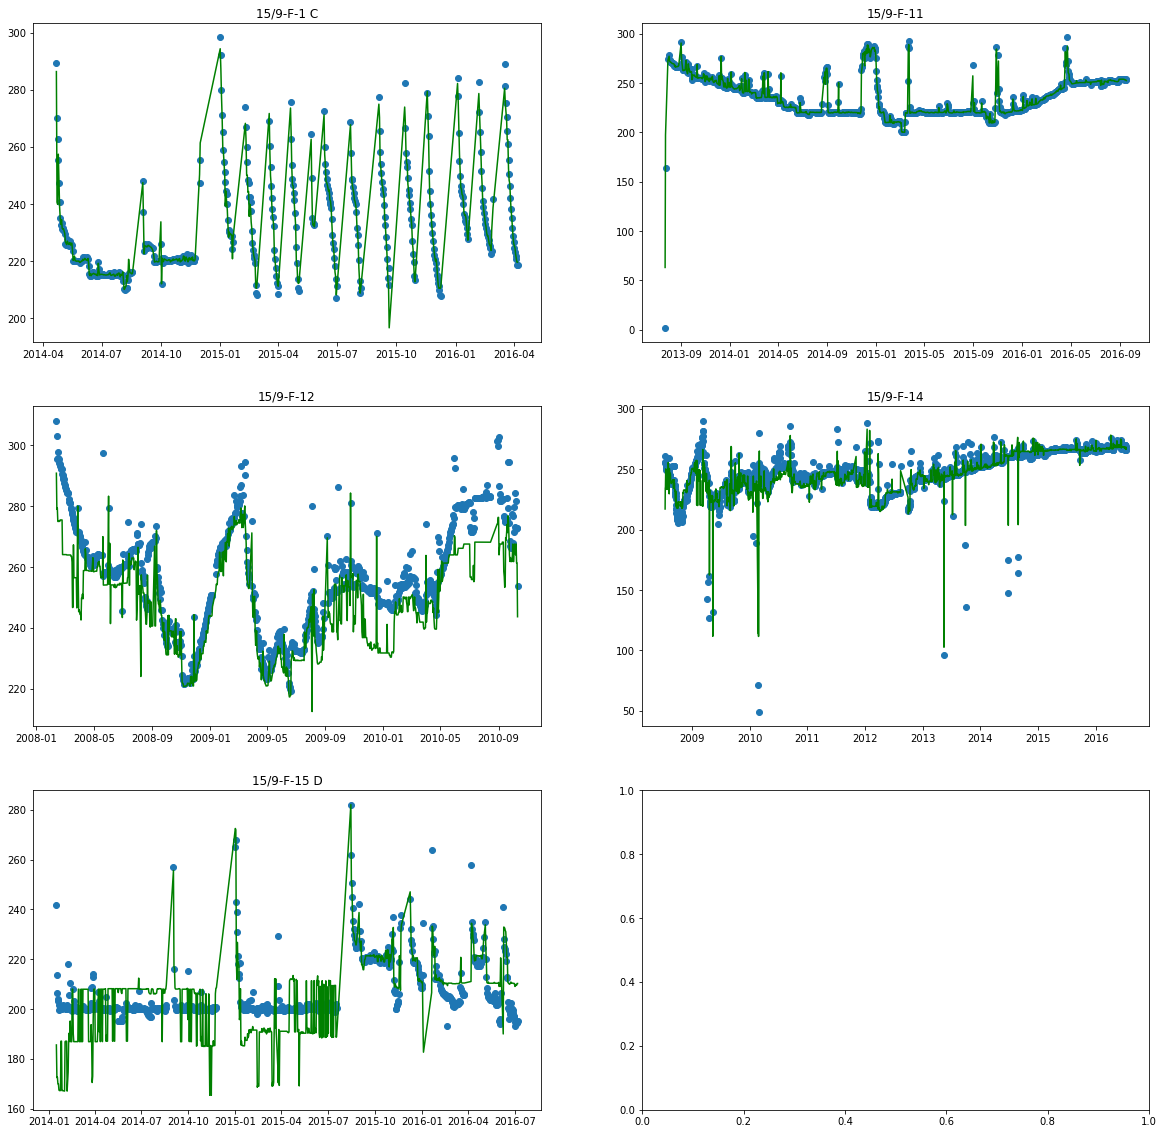

In [118]:
rf_reg = genericml(RandomForestRegressor())
plotter(rf_reg, "bhp_RF")

In [ ]:
# running an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
model = Sequential()
model.add(Dense(32, input_shape = (len(predictors),), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])
model.fit(X_train, y_train.values, batch_size = 700, epochs = 500, verbose = 1)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 11256.8408 - mae: 86.6867
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 10071.8662 - mae: 81.1661
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 9349.5137 - mae: 79.2794
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 8596.6465 - mae: 76.4778
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 7781.3008 - mae: 72.5613
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 6951.3613 - mae: 68.1845
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 6181.8193 - mae: 63.9254
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 5441.5176 - mae: 59.8104
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 4772.5132 - mae: 55.9683
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 4178.3159 - mae: 52.4821
Epoch 11/500
2/2 [===================

In [122]:
df_prod['bhp_ANN'] = model.predict(df_prod[predictors])
#plotter(model, "bhp_ANN")

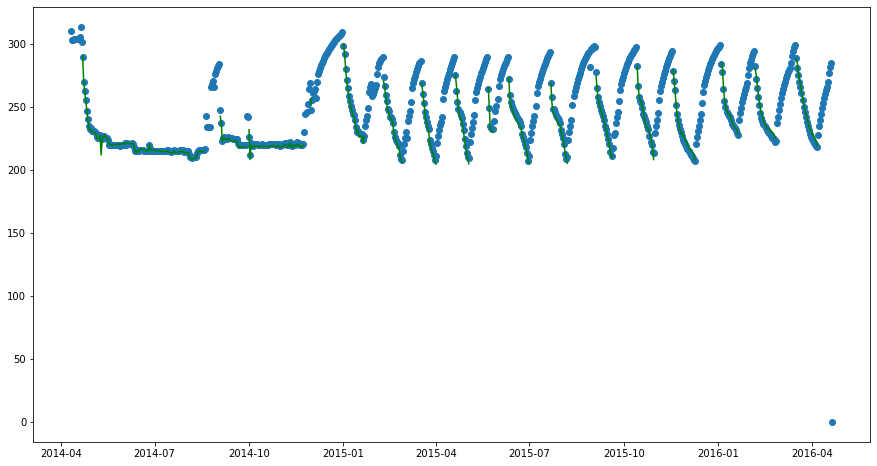

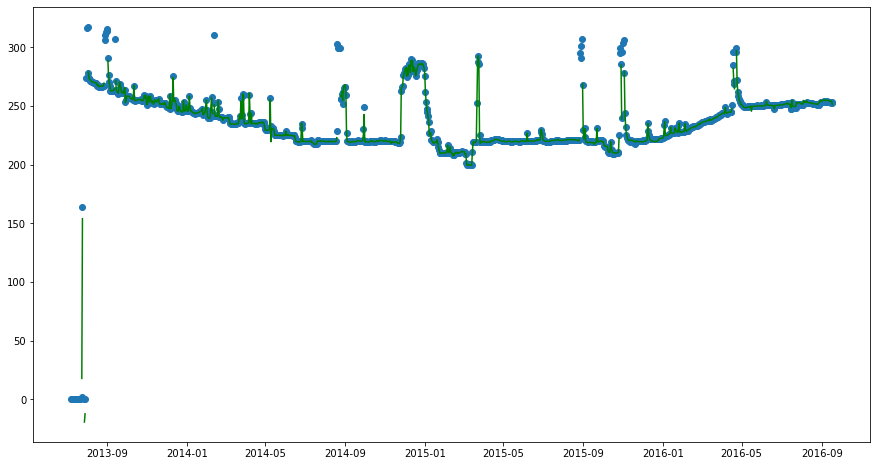

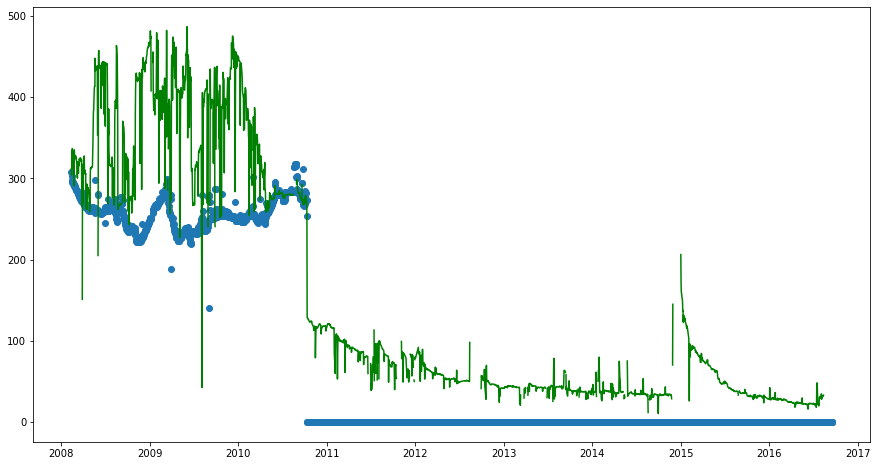

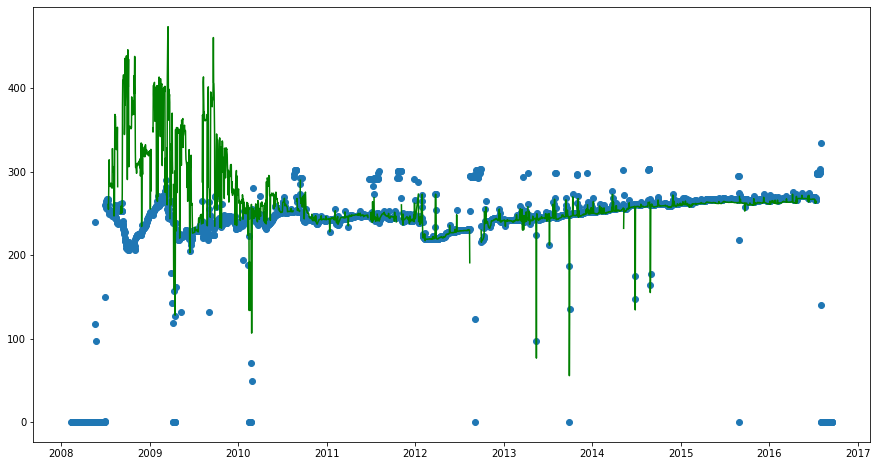

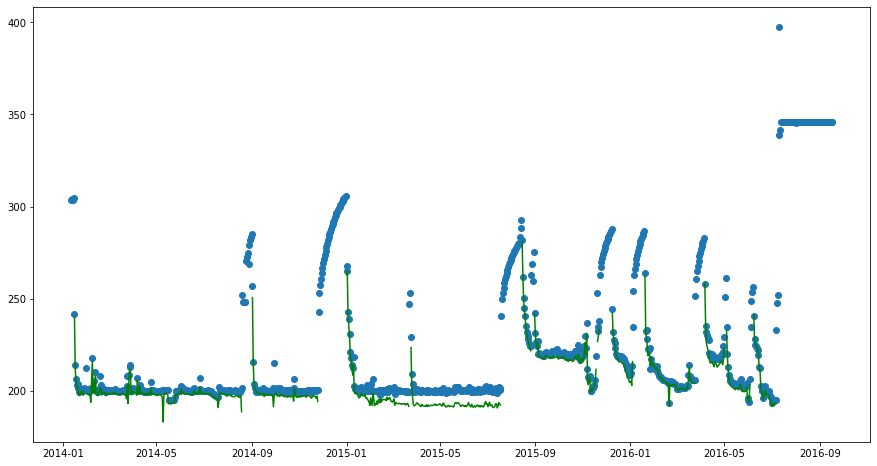

In [123]:
for well in wellnames:
    dfpred = df_prod[df_prod['well_name']==well]
    
    plt.figure(figsize=(15,8))
    plt.scatter(dfpred['dates'], dfpred['bhp'])
    plt.plot(dfpred['dates'], dfpred['bhp_ANN'], color='green')
    plt.show();